In [1]:
import numpy as np
import random
from random import sample
import math
from statistics import mean

In [2]:
z= 125*1e-11 # Degradation thereshold
def state(amount):


  if (amount<z):
    state=0      #work

  if (amount >z):
    state=1 # fail

  return state

In [3]:
state(1e-11)

0

In [4]:
cost=np.matrix([[-1,-11],[-51,-61]])
cost

matrix([[ -1, -11],
        [-51, -61]])

In [5]:
z=125*1e-11
mu_beta=8.4823*1e-15
sigma_beta=6.0016*1e-16
mu_y=1e-10
sigma_y=2*1e-11
lamda_shock=2.5*1e-5
def Environment(Degradation,action,tov):
    if (Degradation >= z) and (action==0):
        next_state=1
        reward=cost[next_state,action]
        Degradation =Degradation

    if (Degradation < z and action==0): #do nothing

        n=np.random.poisson(lamda_shock*tov,1)#number of efective shock
        #print(n)
        w=np.random.normal(1.2,0.2,int(n))
        if any([x>1.5 for x in w]) :
                next_state=1
                reward=cost[next_state,action]
                Degradation =130*1e-11
        else:
                y=np.random.normal(mu_y,sigma_y,int(n))
                magnitude = sum(y)
                Degradation = Degradation+ magnitude + (np.random.normal(mu_beta,sigma_beta) * tov)
                next_state=state(Degradation)
                reward=cost[next_state,action]

    if ( action==1 ): #replace

        n=np.random.poisson(lamda_shock*tov,1)#number of efective shock
        #print(n)
        w=np.random.normal(1.2,0.2,int(n))
        if any([x>1.5 for x in w]) :
                next_state=1
                reward=cost[next_state,action]
                Degradation =130*1e-11
        else:
                y=np.random.normal(mu_y,sigma_y,int(n))
                magnitude = sum(y)
                Degradation = magnitude + (np.random.normal(mu_beta,sigma_beta) * tov)
                next_state=state(Degradation)
                reward=cost[next_state,action]



    return (next_state,reward,Degradation)

In [6]:
Environment(0,1,10**5)

C:\Users\yousefi.k\AppData\Local\Temp\ipykernel_13468\1371712797.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w=np.random.normal(1.2,0.2,int(n))
C:\Users\yousefi.k\AppData\Local\Temp\ipykernel_13468\1371712797.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=np.random.normal(mu_y,sigma_y,int(n))


(1, np.int64(-61), np.float64(1.2680186153554057e-09))

In [7]:
tov=1.05*(10**5)
Degradation = 0
results = []
for i in range(5):
    action = 0
    next_state ,reward,Degradation = Environment(Degradation , action,tov)
    results.append(Degradation)

C:\Users\yousefi.k\AppData\Local\Temp\ipykernel_13468\1371712797.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w=np.random.normal(1.2,0.2,int(n))
C:\Users\yousefi.k\AppData\Local\Temp\ipykernel_13468\1371712797.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=np.random.normal(mu_y,sigma_y,int(n))


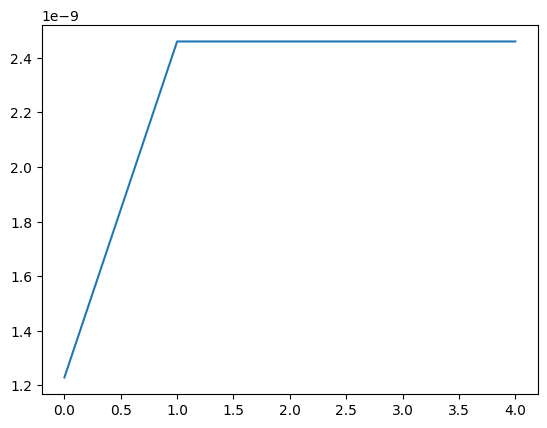

In [8]:

import matplotlib.pyplot as plt
plt.plot(results)
plt.show()

In [9]:
def choose_action(epsilon, state):
    if (np.random.random() < epsilon):
        return random.choice([0,1])
    else:
        return np.argmax(Q_table[state])

In [10]:
#my_score=[]
tau_list = [105000,110000,115000,120000,125000,130000,135000,140000,145000,150000]
q_table_list=[]
for t in tau_list:
    tov=t
    epsilon = 1
    learning_rate = 1
    discount = 0.5
    Degradation=0
    Q_table = np.zeros((2,2)) #1

    scores = []


# Looping for each episode
    for e in range(1000): #2
    # Initializes the state
        current_state = 0 #it is new #3

        rewards = []


    # Looping for each step
        for j in range(int(40000000//tov)):#4
        # Choose A from S
            action = choose_action(epsilon,current_state) #5
        #print(action)
        # Take action
            next_state ,immediate_reward,Degradation = Environment(Degradation,action,tov) #6
            rewards.append(immediate_reward)
            new_state = next_state

        # Update Q(S,A)
            Q_table[current_state][action] += (learning_rate *
                                        (immediate_reward
                                         + discount * np.max(Q_table[new_state])
                                         - Q_table[current_state][action])) #7

            current_state = new_state #8

        learning_rate *= 0.99
        epsilon *= 0.99
        scores.append(sum(rewards))
    #my_score.append(mean(scores))
    print(t)
    #print(Q_table)
    q_table_list.append(Q_table)


C:\Users\yousefi.k\AppData\Local\Temp\ipykernel_13468\1371712797.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w=np.random.normal(1.2,0.2,int(n))
C:\Users\yousefi.k\AppData\Local\Temp\ipykernel_13468\1371712797.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=np.random.normal(mu_y,sigma_y,int(n))
C:\Users\yousefi.k\AppData\Local\Temp\ipykernel_13468\1371712797.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w=np.random.normal(1.2,0.2,int(n))
C:\Us

105000
110000
115000
120000
125000
130000
135000
140000
145000
150000


In [11]:
for i in range(10):
    print("tov is",tau_list[i])
    print((q_table_list[i]))
    print("--------------------------")

tov is 105000
[[-79.99614632 -57.99573397]
 [-79.87870582 -57.83266346]]
--------------------------
tov is 110000
[[-84.33577661 -67.21722658]
 [-84.48744485 -66.95019591]]
--------------------------
tov is 115000
[[-89.12683057 -76.78182747]
 [-89.47113649 -76.58099548]]
--------------------------
tov is 120000
[[-94.48535199 -86.80992195]
 [-95.24359261 -87.03279892]]
--------------------------
tov is 125000
[[ -99.50098108 -101.08799989]
 [-101.0495894   -96.88152987]]
--------------------------
tov is 130000
[[-101.98841177 -103.1914039 ]
 [-102.         -102.52796473]]
--------------------------
tov is 135000
[[-101.99820017 -108.14759017]
 [-102.         -104.63061987]]
--------------------------
tov is 140000
[[-101.99999981 -108.11474464]
 [-102.         -109.20509768]]
--------------------------
tov is 145000
[[-101.99999999 -110.75532306]
 [-102.         -110.30163281]]
--------------------------
tov is 150000
[[-101.99999994 -111.55823621]
 [-102.         -111.50063554]]
---

this plot is for 105000


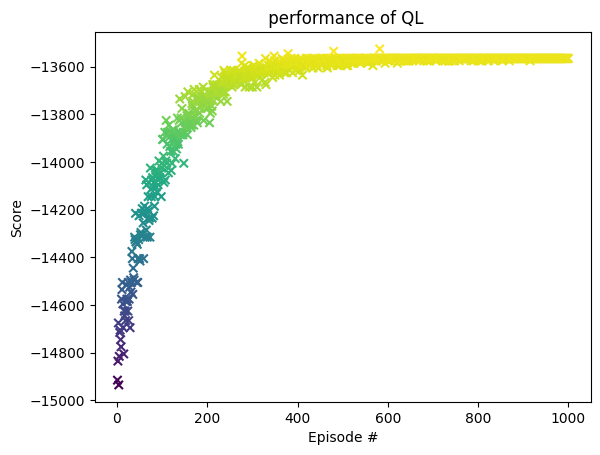

this plot is for 110000


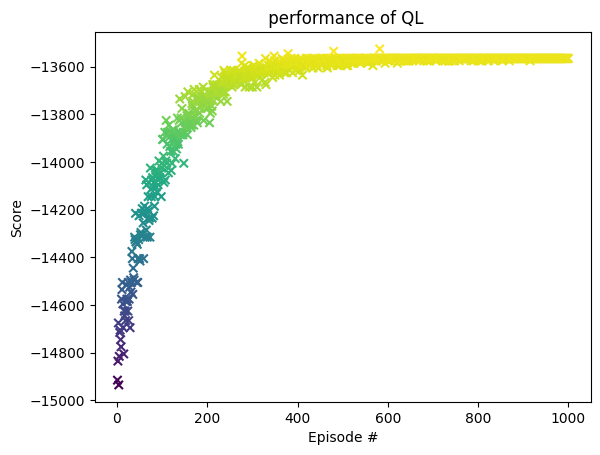

this plot is for 115000


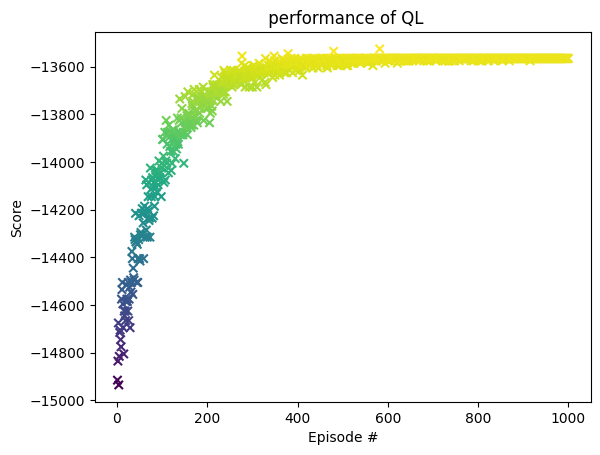

this plot is for 120000


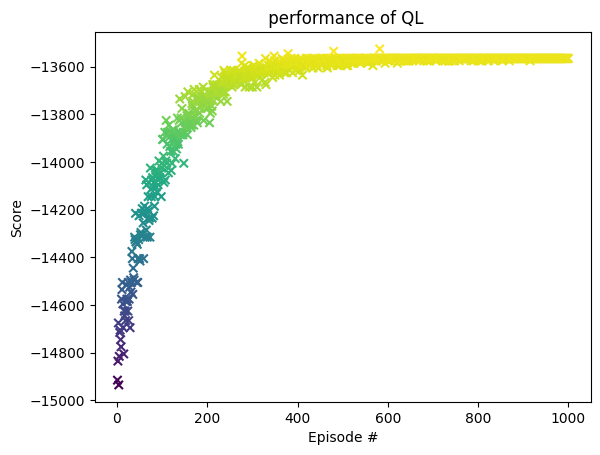

this plot is for 125000


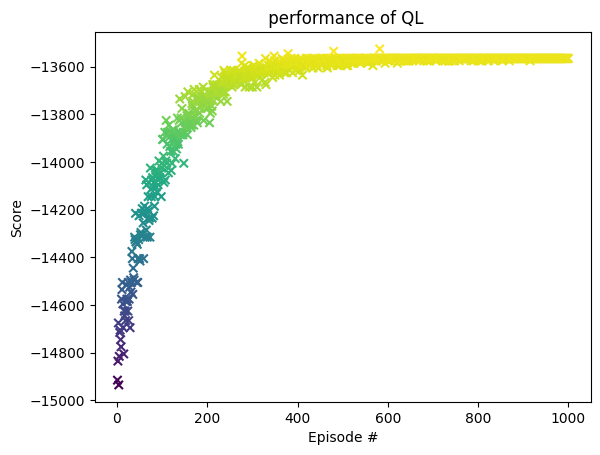

this plot is for 130000


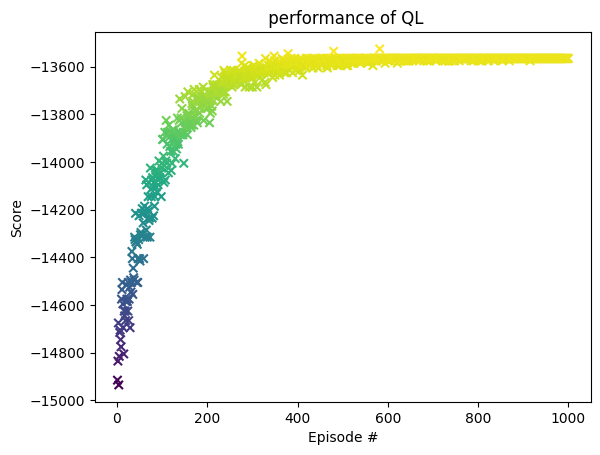

this plot is for 135000


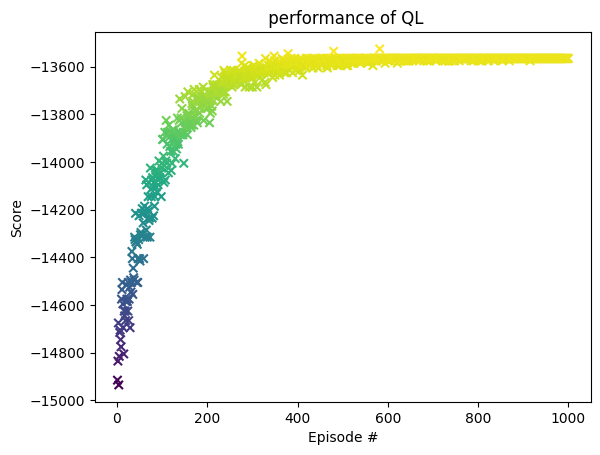

this plot is for 140000


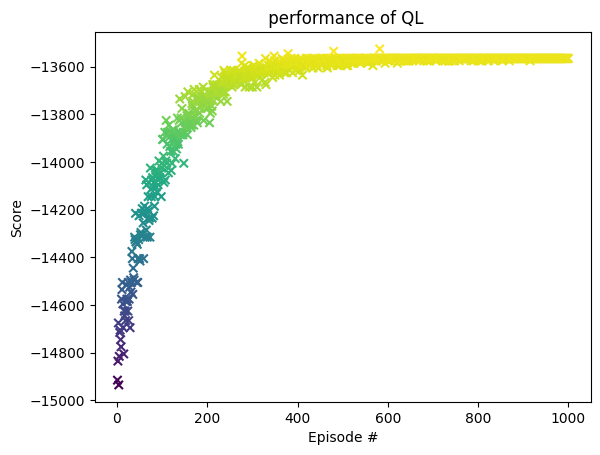

this plot is for 145000


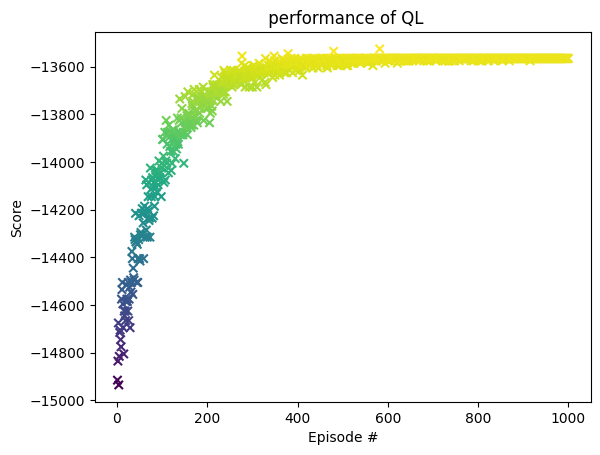

this plot is for 150000


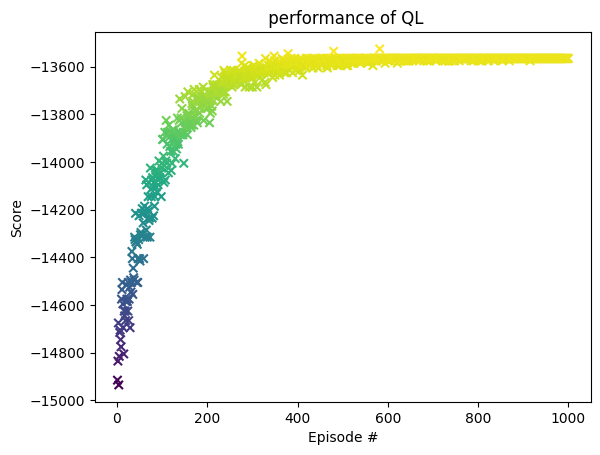

In [12]:
tau_list = [105000,110000,115000,120000,125000,130000,135000,140000,145000,150000]
for t in tau_list:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = np.arange(1, len(scores) + 1)
    y = scores
    plt.scatter(x, y, marker='x', c=y)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.title(' performance of QL')
    print("this plot is for",t)
    plt.show()

In [13]:
tau_list = [105000,110000,115000,120000,125000,130000,135000,140000,145000,150000]


score_tow=[]
for i in range(10):
    tov=tau_list[i]
    #epsilon = 0
    #learning_rate = 0
    discount = 0.5
    Degradation=0
    #Q_table = np.zeros((5,2)) #1

    scores = []


# Looping for each episode
    for e in range(1000): #2
    # Initializes the state
        current_state = 0 #it is new #3

        rewards = []


    # Looping for each step
        for j in range(int(40000000//tov)):#4
        # Choose A from S
            nqtable = q_table_list[i]
            action = np.argmax(nqtable[current_state])
            #for i in range(10):
             #   nqtable=q_table_list[i]
              #  action = np.argmax(nqtable[current_state])
               # print(action)
            #5
        #print(action)
        # Take action
            next_state ,immediate_reward,Degradation = Environment(Degradation,action,tov) #6
            rewards.append(immediate_reward)
            new_state = next_state

        # Update Q(S,A)
            #Q_table[current_state][action] += (learning_rate *
                                        #(immediate_reward
                                         #+ discount * np.max(Q_table[new_state])
                                         #- Q_table[current_state][action])) #7

            current_state = new_state #8

        #learning_rate *= 0.99
        #epsilon *= 0.99
        scores.append(sum(rewards))
    score_tow.append(mean(scores))
    #my_score.append(mean(scores))
    print(tov)
    #print(Q_table)
    #q_table_list.append(Q_table)

C:\Users\yousefi.k\AppData\Local\Temp\ipykernel_13468\1371712797.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w=np.random.normal(1.2,0.2,int(n))
C:\Users\yousefi.k\AppData\Local\Temp\ipykernel_13468\1371712797.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=np.random.normal(mu_y,sigma_y,int(n))


105000
110000
115000
120000


C:\Users\yousefi.k\AppData\Local\Temp\ipykernel_13468\1371712797.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w=np.random.normal(1.2,0.2,int(n))
C:\Users\yousefi.k\AppData\Local\Temp\ipykernel_13468\1371712797.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=np.random.normal(mu_y,sigma_y,int(n))


125000
130000
135000
140000
145000
150000
